<a href="https://colab.research.google.com/github/Chandan2597/Google-Playstore-app-rating-prediction/blob/main/Google_Playstore_apps_rating_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Google Playstore Apps Rating Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name**            - Chandan Koiri

# **Project Summary -**

**Context -**

While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart
datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App
Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other
hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making
scraping more challenging.

**Content -**

Each app (row) has values for catergory, rating, size, and more.

**Acknowledgements -**

This information is scraped from the Google Play Store. This app information would not be available without it.

**Inspiration -**

The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights
can be drawn for developers to work on and capture the Android market!

The Internet is a true gold mine of data. E-commerce and review sites are brimming with a lot of untapped data with a prominent potential to convert into meaningful insights that can help with robust decision making. Here, I have explored using data science and machine learning techniques on data retrieved from one such avenue on the internet, the Google Play Store. I have predicted rating of an app. Used following pipeline to accomplish this task.

* Data Wrangling and Preprocessing
* Exploratory Data Analysis
* Feature Selection
* Model Training
* Testing and Optimization

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


To analyze the Google Play Store dataset and draw useful insights using exploratory
data analysis (EDA), visualization, and machine learning techniques. The dataset
contains various app-related attributes such as ratings, reviews, price, size, installs,
and more. We will clean the data, perform EDA, and use visualizations to uncover
hidden patterns and trends.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1781]:
# Importing Libraries
import numpy as np
import pandas as pd
from numpy import math
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [1782]:
# Mounting gdrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1783]:
# Loading Dataset
apps_df = pd.read_csv('/content/drive/MyDrive/Dataset/Google playstore apps rating data/googleplaystore.csv')

### Dataset First View

In [1784]:
# Dataset First Look
apps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Dataset Rows & Columns count

In [1785]:
# Dataset Rows & Columns count
print("Rows: ",apps_df.shape[0])
print("Columns: ",apps_df.shape[1])

Rows:  10841
Columns:  13


### Dataset Information

In [1786]:
# Dataset Info
apps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#### Duplicate Values

In [1787]:
# Dataset Duplicate Value Count
apps_df.duplicated().sum()

483

#### Missing Values/Null Values

In [1788]:
# Missing Values/Null Values Count
apps_df.isna().sum()

,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


<Axes: >

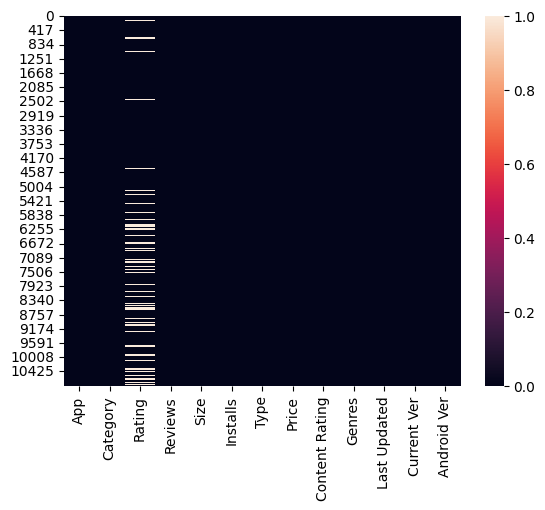

In [1789]:
# Visualizing the missing values
sns.heatmap(apps_df.isna())

### What did you know about your dataset?

1. ***Dataset has 10841 observations and 13 features.***
2. ***There are total 483 duplicate values present in teh dataset.***
3. ***Count of missing values present in the dataset columns are -***
  * ***Rating - 1474***
  * ***Type - 1***
  * ***Content Rating - 1***
  * ***Current Ver - 8***
  * ***Android Ver - 3***

## ***2. Understanding Your Variables***

In [1790]:
# Dataset Columns
apps_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [1791]:
# Dataset Describe
apps_df.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variables Description

* **App** : The name of the app
* **Category** : The category of the app
* **Rating** : The rating of the app in the Play Store
* **Reviews** : The number of reviews of the app
* **Size** : The size of the app
* **Install** : The number of installs of the app
* **Type** : The type of the app (Free/Paid)
* **Price** : The price of the app (0 if it is Free)
* **Content Rating** : The appropiate target audience of the app
* **Genres**: The genre of the app
* **Last Updated** : The date when the app was last updated
* **Current Ver** : The current version of the app
* **Android Ver** : The minimum Android version required to run the app

### Check Unique Values for each variable.

In [1792]:
# Check Unique Values for each variable.
for i in apps_df.columns.tolist():
  print("No. of unique values in ",i,"is",apps_df[i].nunique())

No. of unique values in  App is 9660
No. of unique values in  Category is 34
No. of unique values in  Rating is 40
No. of unique values in  Reviews is 6002
No. of unique values in  Size is 462
No. of unique values in  Installs is 22
No. of unique values in  Type is 3
No. of unique values in  Price is 93
No. of unique values in  Content Rating is 6
No. of unique values in  Genres is 120
No. of unique values in  Last Updated is 1378
No. of unique values in  Current Ver is 2832
No. of unique values in  Android Ver is 33


## 3. ***Data Wrangling***

### Data Wrangling Code

In [1793]:
# Clearly 'Rating' column has most null value and it is our the dependent variable.
# The best way to fill missing values might be using the median instead of mean.
apps_df['Rating'].fillna(apps_df['Rating'].median(), inplace = True)

In [1794]:
#Lets check the datatype of Review column
apps_df['Reviews'].dtype

dtype('O')

In [1795]:
apps_df['Reviews']=apps_df['Reviews'].replace('3.0M','3000000.0')

In [1796]:
# Converting Reviews to numeric
apps_df['Reviews']=apps_df['Reviews'].astype(float)

In [1797]:
# let's look at the apps in the data
apps_df['App'].value_counts().head(20)

,count
App,
ROBLOX,9
"CBS Sports App - Scores, News, Stats & Watch Live",8
ESPN,7
Duolingo: Learn Languages Free,7
Candy Crush Saga,7
8 Ball Pool,7
slither.io,6
Bubble Shooter,6
Zombie Catchers,6


In [1798]:
# Let's check out app category
apps_df.Category.value_counts()

,count
Category,
FAMILY,1972
GAME,1144
TOOLS,843
MEDICAL,463
BUSINESS,460
PRODUCTIVITY,424
PERSONALIZATION,392
COMMUNICATION,387
SPORTS,384


In [1799]:
# Dropping category 1.9 which is irrelevant to our model
apps_df[apps_df['Category'] == '1.9']
apps_df = apps_df.drop([10472])

In [1800]:
#Dropping other duplicate entries and keeping the App with the highest reviews
apps_df.drop_duplicates('App', keep = 'last', inplace = True)
apps_df.App.value_counts()

,count
App,
Photo Editor & Candy Camera & Grid & ScrapBook,1
Rockstars of Ooo,1
Angelo Rules - Crazy day,1
Flipped Out! - Powerpuff Girls,1
Adventure Time Game Wizard,1
...,...
Mopar Drag N Brag,1
Read Unlimitedly! Kids'n Books,1
Dark Infusion Substratum Theme for Android N & O,1


In [1801]:
# Let's deal with the size of app
apps_df.Size.value_counts()

,count
Size,
Varies with device,1227
11M,182
12M,181
13M,177
14M,177
...,...
429k,1
200k,1
460k,1


In [1802]:
#Replacing 'M' and 'k' values in size column
apps_df['Size']=apps_df['Size'].str.replace('M','000') # This Converte sizes to Kbytes
apps_df['Size']=apps_df['Size'].replace('Varies with device',np.nan)
apps_df['Size']=apps_df['Size'].str.replace('k','')
apps_df['Size']=apps_df['Size'].replace('1,000+','1000')

In [1803]:
#Converting Size to numeric
apps_df['Size'] = apps_df['Size'].astype(float)

In [1804]:
#Now lets Check the Install
apps_df.Installs.value_counts()

,count
Installs,
"1,000,000+",1419
"100,000+",1114
"10,000+",1031
"10,000,000+",933
"1,000+",887
100+,709
"5,000,000+",607
"500,000+",504
"50,000+",469


In [1805]:
#Now replacing '+' and ',' signs
apps_df['Installs']=apps_df['Installs'].str.replace(',','')
apps_df['Installs']=apps_df['Installs'].str.replace('+','')
apps_df['Installs']=apps_df['Installs'].replace('Free',np.nan)

In [1806]:
#Now converting to numeric value
apps_df['Installs']=apps_df['Installs'].astype(float)

In [1807]:
#Let's check the Price
apps_df.Price.value_counts()

,count
Price,
0,8905
$0.99,145
$2.99,124
$1.99,73
$4.99,70
...,...
$19.90,1
$1.75,1
$14.00,1


In [1808]:
# Price field is a string and has $ sign. Removing it and converting it to numeric
apps_df['Price']=apps_df["Price"].str.replace('$','')
apps_df['Price']=apps_df["Price"].replace('Everyone',np.nan)
apps_df['Price']=apps_df["Price"].astype(float)

In [1809]:
apps_df.Price.describe()

,Price
count,9659.000000
mean,1.097231
std,16.851618
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,400.000000


In [1810]:
#Now checking for null values
apps_df.isna().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,1227
Installs,0
Type,1
Price,0
Content Rating,0
Genres,0


In [1811]:
#Removing null values
apps_df.dropna(inplace=True)

In [1812]:
apps_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8422 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8422 non-null   object 
 1   Category        8422 non-null   object 
 2   Rating          8422 non-null   float64
 3   Reviews         8422 non-null   float64
 4   Size            8422 non-null   float64
 5   Installs        8422 non-null   float64
 6   Type            8422 non-null   object 
 7   Price           8422 non-null   float64
 8   Content Rating  8422 non-null   object 
 9   Genres          8422 non-null   object 
 10  Last Updated    8422 non-null   object 
 11  Current Ver     8422 non-null   object 
 12  Android Ver     8422 non-null   object 
dtypes: float64(5), object(8)
memory usage: 921.2+ KB


### What all manipulations have you done?

1. ***Filled the missing values in "Rating" column with its median value.***
2. ***Converted "Reviews" to numeric.***
3. ***Removed "Category" 1.9 which was irrelavent to our data.***
4. ***Removed other duplicated entries in the "App" column.***
5. ***Converted non numeric values in the "Size" column to NaN value and replaced M with million and K with thousand. Converted it to numeric***
6. ***Removed + and , signs in the Installs column and converted it to numeric.***
7. ***Removed $ symbol from Price and converted it to numeric.***
8. ***Dropped the remaining null values in the columns "Type", "Current Ver", and "Android Ver".***

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Distribution of App Ratings

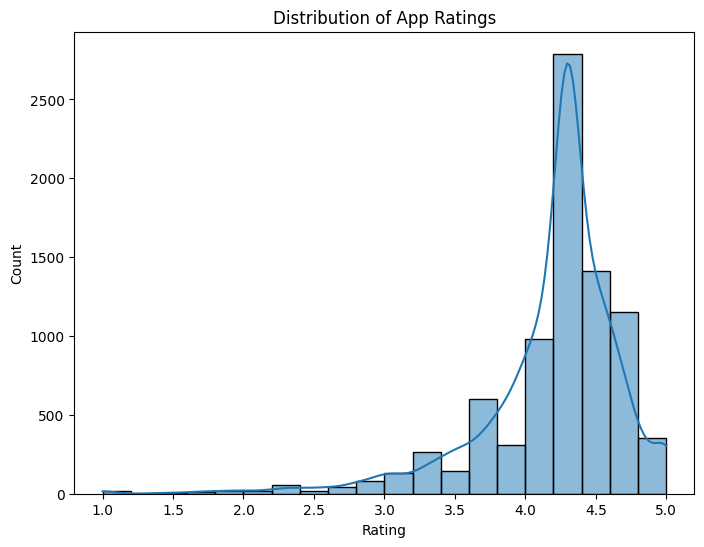

In [1813]:
# Chart - 1 visualization code
plt.figure(figsize=(8,6))
sns.histplot(apps_df['Rating'], bins=20, kde=True)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

##### 1. What is/are the insight(s) found from the chart?

* ***A lot of people rate the app between 4 and 5.***
* ***Not many people give ratings below 2.***
* ***The highest bar is at 4.5, meaning it's the most frequent rating.***

##### 2. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* ***High ratings are good. They make the app look trustworthy and attract more users. People are more likely to download an app with good reviews.***
* ***Even though low ratings are few, they still exist. Negative reviews can scare off potential users. People might think the app has problems if they see even a few bad ratings.***

#### Chart - 2 Top 10 App Categories by Number of Apps

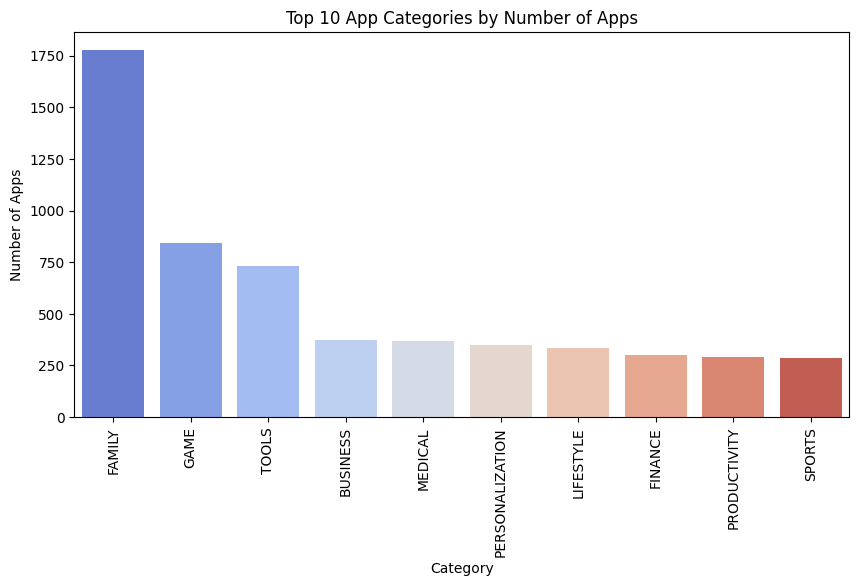

In [1814]:
# Chart - 2 visualization code
plt.figure(figsize=(10,5))
top_categories = apps_df['Category'].value_counts().head(10)
sns.barplot(x=top_categories.index, y=top_categories.values,
palette='coolwarm')
plt.title('Top 10 App Categories by Number of Apps')
plt.ylabel('Number of Apps')
plt.xlabel('Category')
plt.xticks(rotation=90)
plt.show()

##### 1. What is/are the insight(s) found from the chart?

* ***The chart shows way more apps in the "Family" and "Game" categories than others.***
*   ***Sports has the fewest apps among the top 10.***
* ***There's a big difference in app numbers between "Tools" and "Business" (the next highest).***

##### 2. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* ***If we're making a family or game app, this shows a big market. We might have a good chance to get many users.***
* ***But at the same time If we make an app in a crowded category (like Family or Games), it's harder to stand out. We'll have lots of competition.***
* ***Also if we ignore categories with fewer apps (like Sports), we might miss a chance to be a leader in a less crowded market. There might be less competition, but there might also be less demand.***

#### Chart - 3 Free vs Paid apps

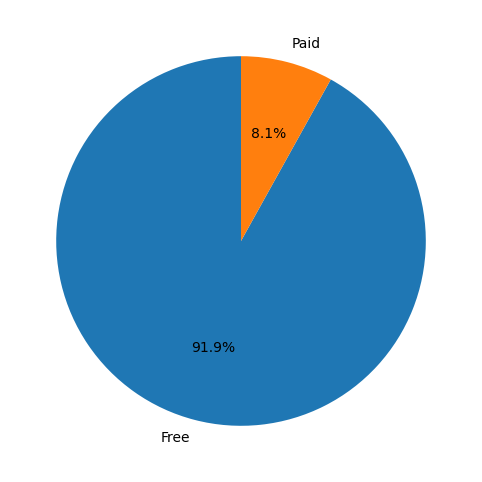

In [1815]:
# Chart - 3 visualization code
# Free vs Paid apps
plt.figure(figsize=(8,6))
app_type_counts = apps_df['Type'].value_counts()
plt.pie(app_type_counts, labels=app_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.show()

##### 1. What is/are the insight(s) found from the chart?

* ***A huge part (92.2%) of the apps are free.***
* ***Only a small part (7.8%) of the apps cost money.***

##### 2. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* ***Knowing most users prefer free apps can help. We might make more money by offering a free version and then charging for extra features.***
* ***On the other hand if we only focus on paid apps, we'll miss out on most users. The chart shows that people don't usually pay for apps upfront. It might be hard to get many users if our app isn't free to try.***

#### Chart - 4 Correlation Between Reviews and Ratings

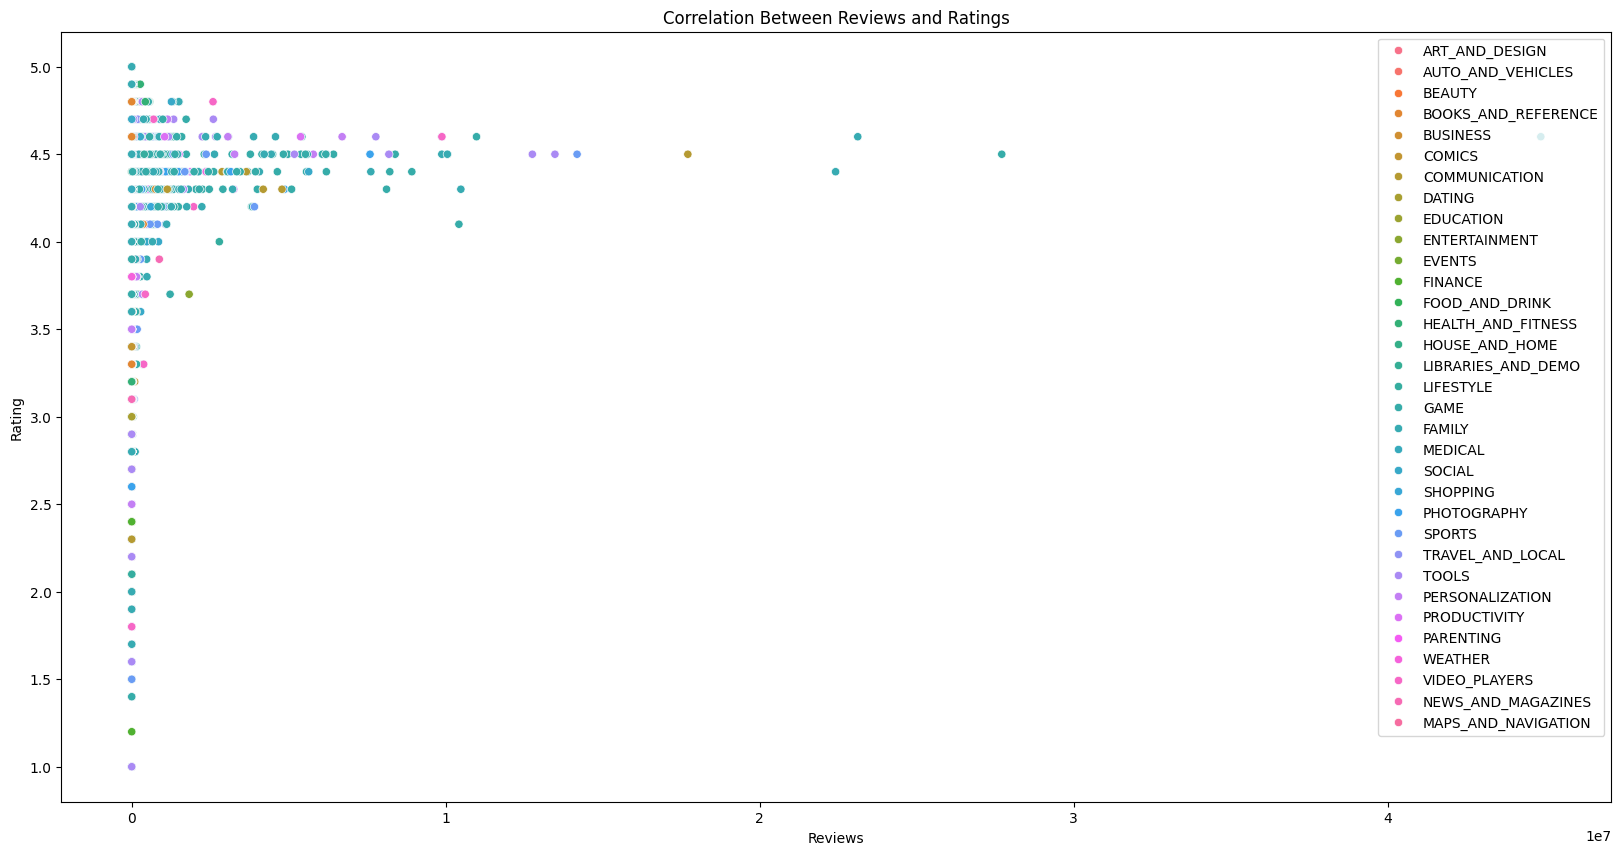

In [1816]:
# Chart - 4 visualization code
plt.figure(figsize=(20,10))
sns.scatterplot(x='Reviews', y='Rating', data=apps_df, hue='Category')
plt.title('Correlation Between Reviews and Ratings')
plt.legend()
plt.show()

##### 1. What is/are the insight(s) found from the chart?

* ***Apps with lots of reviews tend to have higher ratings (closer to 5).***
* ***Apps with only a few reviews have ratings scattered from 1 to 5.***
* ***Even with many reviews, some apps still get lower ratings (below 4).***

##### 2. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* ***It shows that getting more reviews can help an app look better and more trustworthy. This can get more people to download the app.***
* **If an app has mostly low ratings (even with few reviews), it can scare people away. Nobody wants an app with bad reviews.**

#### Chart - 5 Price Distribution for Paid Apps

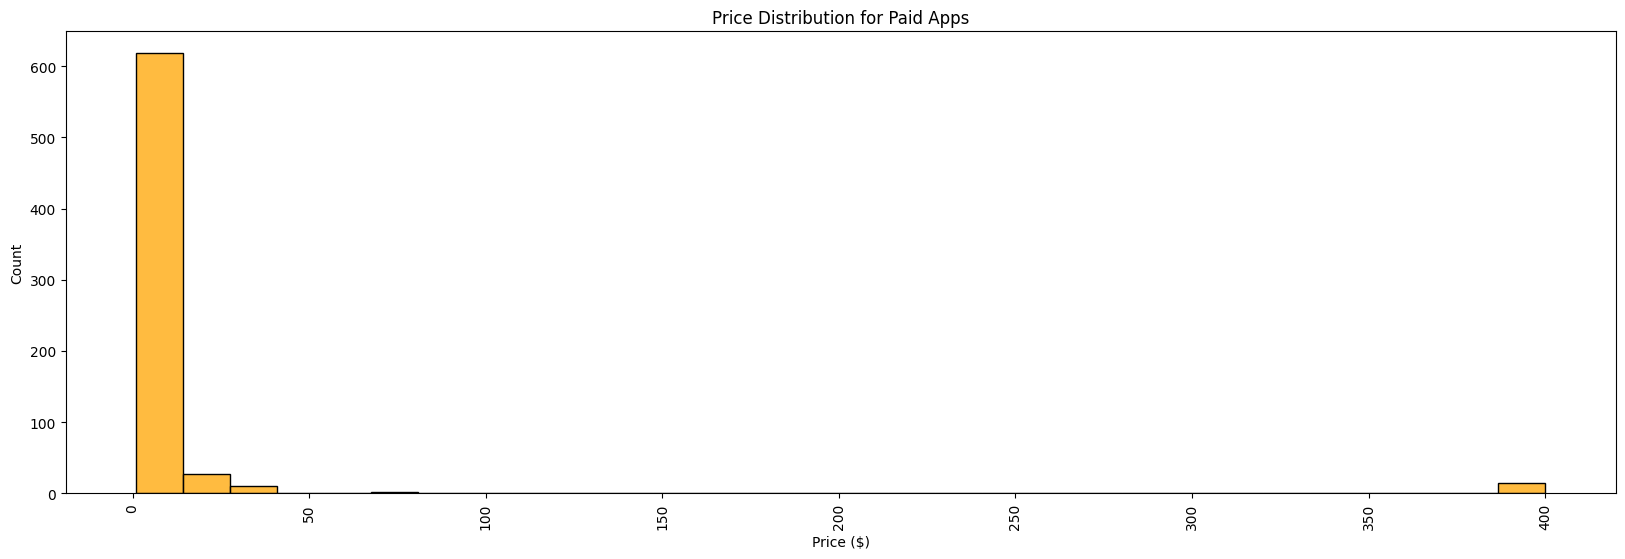

In [1817]:
# Chart - 5 visualization code
paid_apps = apps_df[apps_df['Type'] == 'Paid']
plt.figure(figsize=(20,6))
sns.histplot(paid_apps['Price'], bins=30, color='orange')
plt.title('Price Distribution for Paid Apps')
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

##### 1. What is/are the insight(s) found from the chart?

* ***Many apps cost between 0 and $10.***

* ***The most common price is $0.99.***

* ***Not many apps cost more than $50.***

##### 2. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* ***If we price your app reasonably (like around $0.99), we might get more people to buy it. This can lead to more sales.***

* ***If you price your app too high (like $50 or more), very few people will buy it. We might not make much money.***

#### Chart - 6 Price vs Rating for Paid Apps

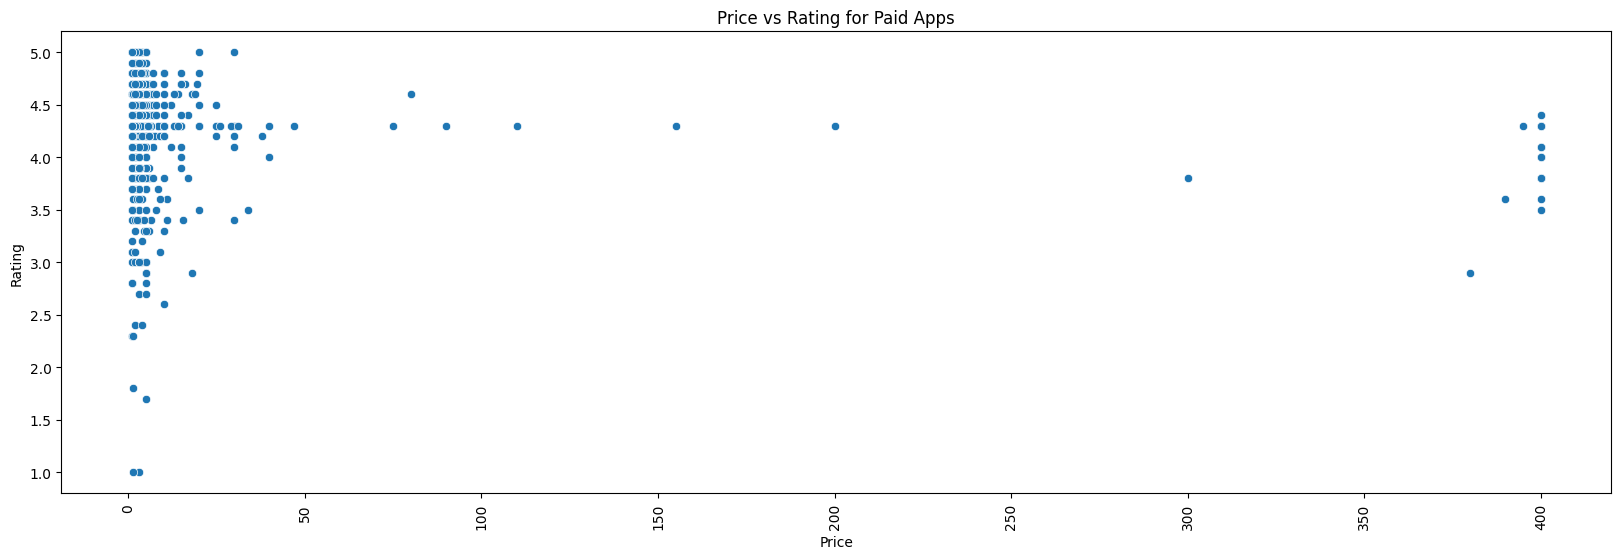

In [1818]:
# Chart - 6 visualization code
plt.figure(figsize=(20,6))
sns.scatterplot(x='Price', y='Rating', data=paid_apps)
plt.title('Price vs Rating for Paid Apps')
plt.xticks(rotation=90)
plt.show()

##### 1. What is/are the insight(s) found from the chart?

* ***Many apps priced under $10 have good ratings (above 4).***

* ***Apps costing more than $10 have ratings that vary a lot, from low to high.***
* ***Even at the lowest price, some apps get bad ratings.***

##### 2. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* ***The chart suggests people are willing to pay a little for quality. A good, cheap app can do well.***
* ***But just because an app is cheap doesn't guarantee good ratings or success. Some $0.99 apps get bad reviews, meaning low price alone isn't enough to please users.***

#### Chart - 7 Boxplot for Rating vs Content rating


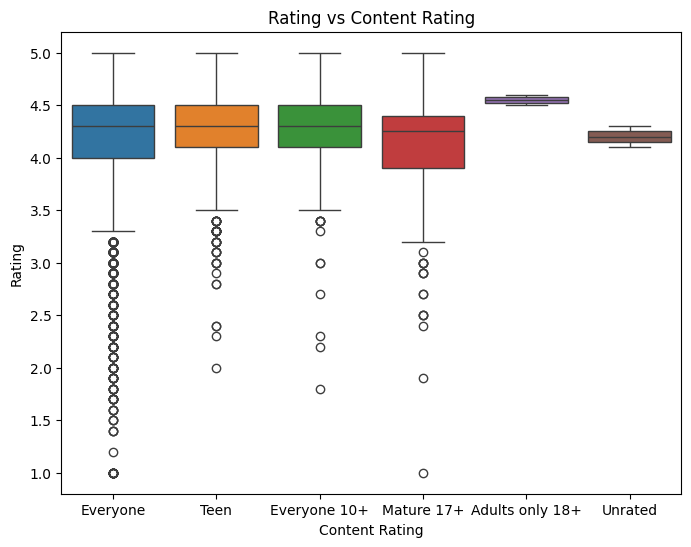

In [1819]:
# Chart - 7 visualization code
plt.figure(figsize=[8,6])
sns.boxplot(x='Content Rating', y='Rating', hue= 'Content Rating', data=apps_df)
plt.title('Rating vs Content Rating')
plt.show()

##### 1. What is/are the insight(s) found from the chart?

* ***The "Everyone" category has the most apps with very low ratings (close to 1).***
* ***Adults Only 18+ apps have highest average ratings.***
* ***Apps for older audiences ("Teen" and up) have ratings that are more closely grouped together.***

##### 2. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* ***If we're making an app for teens or adults, this suggests we have a good chance of getting a decent rating if our app is good.***

#### Chart - 8 Boxplot for Rating vs Category

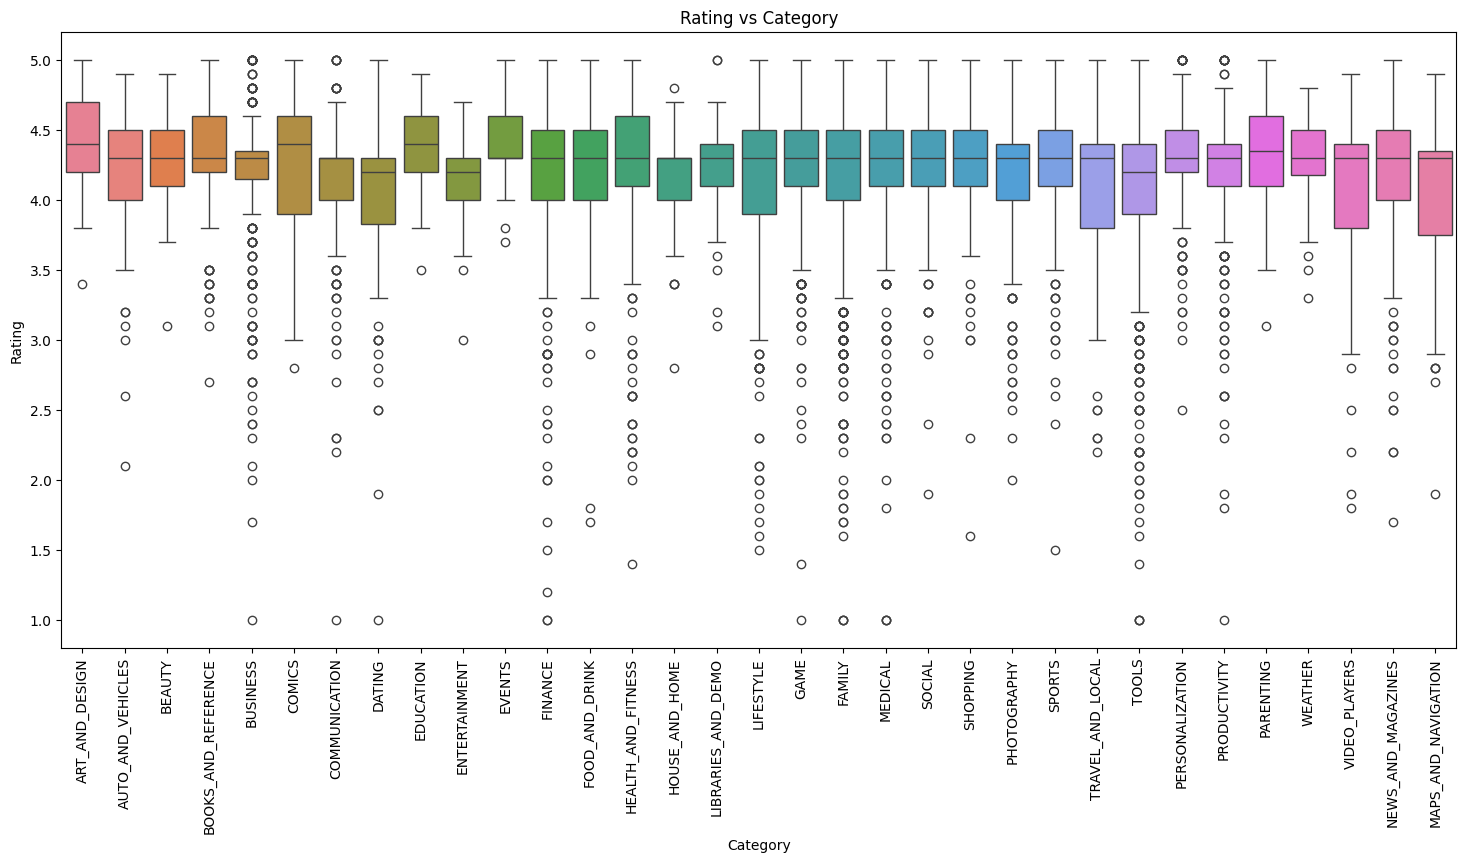

In [1820]:
# Chart - 8 visualization code
plt.figure(figsize=[18,8])
sns.boxplot(x='Category', y='Rating', hue= 'Category', data=apps_df)
plt.title('Rating vs Category')
plt.xticks(rotation=90)
plt.show()

##### 1. What is/are the insight(s) found from the chart?

* ***Events has best and consistent ratings, when compared to other genre apps.***
* ***Categories like Art & Design, Beauty, Books & Reference, and Personalization have higher median ratings, meaning users are more satisfied with these apps.***
* ***Some categories have many outliers below 3.0, suggesting that certain apps in these categories perform poorly.***

##### 2. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

***Yes, Developers can focus on high-rated categories to maintain quality and attract more users.
For lower-rated categories, improving app performance and user experience can help gain more positive reviews.***

#### Chart - 9 - Correlation Heatmap

<Axes: >

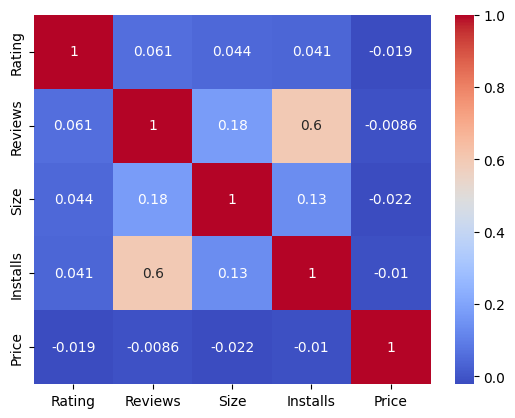

In [1821]:
# Correlation Heatmap visualization code
sns.heatmap(apps_df.corr(numeric_only=True), annot=True, cmap='coolwarm')

##### 1. What is/are the insight(s) found from the chart?

* ***Reviews & Installs (0.6) have a strong positive correlation, meaning apps with more installs tend to get more reviews.***
* ***Size & Installs (0.13) and Size & Reviews (0.18) have a weak correlation, indicating app size has little impact on installs and reviews.***
* ***Rating has a very weak correlation with reviews (0.061), installs (0.04), and size (0.038), meaning these factors do not strongly affect ratings.***
* ***Price has a slight negative correlation with rating (-0.016), suggesting that paid apps might receive slightly lower ratings.***

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [1822]:
# Handling Missing Values & Missing Value Imputation

#Checking for missing values
apps_df.isna().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0


* ***We can see there are no missing values left in the data.***

### 2. Handling Outliers

In [1823]:
# Handling Outliers & Outlier treatments

#Checking for outliers in the data
apps_df.describe([0.25,0.50,0.75,0.95,0.99])

,Rating,Reviews,Size,Installs,Price
count,8422.000000,8.422000e+03,8422.000000,8.422000e+03,8422.000000
mean,4.183935,1.209023e+05,18394.229542,3.732211e+06,1.224644
std,0.512913,9.367925e+05,23299.496056,2.484876e+07,18.038796
min,1.000000,0.000000e+00,1.000000,0.000000e+00,0.000000
25%,4.000000,1.700000e+01,5.300000,1.000000e+03,0.000000
50%,4.300000,4.800000e+02,12000.000000,5.000000e+04,0.000000
75%,4.500000,1.568975e+04,28000.000000,1.000000e+06,0.000000
95%,4.800000,3.465879e+05,70000.000000,1.000000e+07,1.990000
99%,5.000000,2.463027e+06,96000.000000,1.000000e+08,9.990000
max,5.000000,4.488145e+07,100000.000000,1.000000e+09,400.000000


*  ***The correlation heatmap and statistical summary indicate the presence of outliers in the dataset.***

In [1824]:
#Checking for high priced apps and dropping them
len(apps_df[apps_df.Price>150])

19

In [1825]:
apps_df = apps_df[apps_df.Price<=150].copy()

In [1826]:
apps_df.shape

(8403, 13)

In [1827]:
#Checking for Reviews more than 260000 and dropping them
len(apps_df[apps_df.Reviews>260000])

515

In [1828]:
apps_df = apps_df[apps_df.Reviews<=260000].copy()

In [1829]:
#99% of app downloads are within 100M, only 1% are more than 100M. Hence dropping them
apps_df= apps_df[apps_df.Installs<=100000000].copy()

In [1830]:
#Reviews and Install have some values that are still relatively very high. Before building a linear regression model, we need to reduce the skew.
#Applying log transformation (np.log1p) to Reviews and Installs.
apps_df['Reviews'] = np.log1p(apps_df['Reviews'])
apps_df['Installs'] = np.log1p(apps_df['Installs'])

In [1831]:
apps_df.Reviews.unique()

array([ 5.07517382, 11.37951978, 12.28138882, ...,  6.78671695,
        6.4035742 ,  7.08673793])

In [1832]:
new_df = apps_df.copy()

##### What all outlier treatment techniques have you used and why did you use those techniques?

* **Dropped extremely high values to remove the outliers.**

### 3. Feature Manipulation & Selection

#### 1. Feature Selection

In [1833]:
# Select your features wisely to avoid overfitting
# Dropping columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.
new_df.drop(['App', 'Last Updated', 'Current Ver', 'Android Ver'], axis=1, inplace=True)

### 4. Categorical Encoding

In [1834]:
# Encoding categorical columns
new_df = pd.get_dummies(new_df, columns=['Genres','Category', 'Type', 'Content Rating'], drop_first=True)

In [1835]:
new_df.columns

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price',
       'Genres_Action;Action & Adventure', 'Genres_Adventure',
       'Genres_Adventure;Action & Adventure', 'Genres_Adventure;Brain Games',
       'Genres_Arcade',
       ...
       'Category_TOOLS', 'Category_TRAVEL_AND_LOCAL', 'Category_VIDEO_PLAYERS',
       'Category_WEATHER', 'Type_Paid', 'Content Rating_Everyone',
       'Content Rating_Everyone 10+', 'Content Rating_Mature 17+',
       'Content Rating_Teen', 'Content Rating_Unrated'],
      dtype='object', length=156)

#### What all categorical encoding techniques have you used?

* **I have used Label Encoding to encode the categorical columns in the data.**

### 5. Data Splitting

In [1836]:
# Splitting our data to train and test.
from sklearn.model_selection import train_test_split

X = new_df.drop('Rating', axis=1)
y = new_df['Rating']

In [1837]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### What data splitting ratio have you used?

* **I have used 80% of data for training and 20% for testing purpose.**

## **6. ML Model Implementation***

### ML Model - 1 Linear Regression

In [1838]:
# ML Model - 1 Implementation
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

# Fit the Algorithm
regressor.fit(X_train, y_train)

# Predict on the model
y_pred_reg = regressor.predict(X_test)

y_pred_train = regressor.predict(X_train)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [1839]:
# Visualizing evaluation Metric Score chart
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Calculating evaluation metrics for train data
mse = mean_squared_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)
mae = mean_absolute_error(y_train, y_pred_train)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)

Mean Squared Error: 0.24009500450819657
R-squared: 0.10990538870130717
Mean Absolute Error: 0.3365601615390771


In [1840]:
# Calculating evaluation metrics for test data
pred_reg = regressor.predict(X_test)
mse_reg = mean_squared_error(y_test, y_pred_reg)
r2_reg = r2_score(y_test, y_pred_reg)
rmse_reg = np.sqrt(mean_squared_error(y_test, y_pred_reg))
mae_reg = mean_absolute_error(y_test, y_pred_reg)

print("Mean Absolute Error:", mae_reg)
print("Mean Squared Error:", mse_reg)
print("Root Mean Squared Error:", rmse_reg)

Mean Absolute Error: 0.3543845138310857
Mean Squared Error: 0.26577306437724374
Root Mean Squared Error: 0.5155318267355021


### ML Model - 2 Random Forest Regressor

In [1841]:
# ML Model - 2 Implementation
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the Algorithm
rf_model.fit(X_train, y_train)

# Predict on the model
y_pred_rf = rf_model.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [1842]:
# Visualizing evaluation Metric Score chart
pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print("Mean Absolute Error:", mae_rf)
print("Mean Squared Error:", mse_rf)
print("Root Mean Squared Error:", rmse_rf)

Mean Absolute Error: 0.345715574265194
Mean Squared Error: 0.26261567325189894
Root Mean Squared Error: 0.5124604113996504


### ML Model - 3 Neural Network

In [1843]:
# ML Model 3 - Implementation
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from tensorflow.python.data import Dataset
from tensorflow import keras

input_shape = X_train.shape[1]

model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu, input_shape=(input_shape,)),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1, activation=tf.nn.relu)

])

optimizer = tf.keras.optimizers.Adam()

# The loss is the mean square error and the metric used is the mean absolute error
model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mae'])

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 64)                  │           9,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,801 (50.00 KB)

 Trainable params: 12,705 (49.63 KB)

 Non-trainable params: 96 (384.00 B)

In [1844]:
#To check whether our model runs
class Dot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0 : print('')
    print ('.', end='')

set_epoch = 1000
tf.random.set_seed(1)

# Storing training stats
fitting = model.fit(X_train, y_train, batch_size= 1000, epochs = set_epoch,
                   validation_data = (X_test,y_test), verbose = 0,
                   callbacks=[Dot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

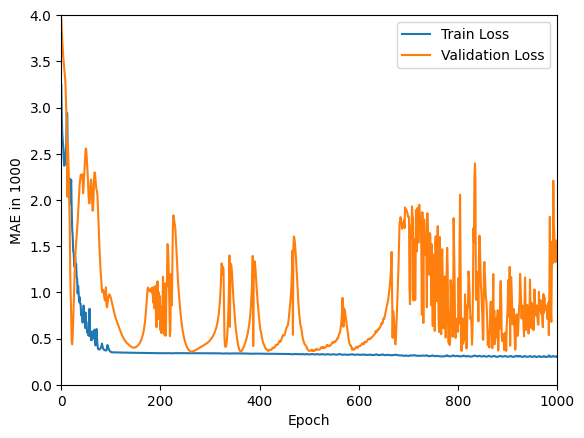

In [1845]:
def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('MAE in 1000')
  plt.plot(history.epoch, np.array(history.history['mae']), label = 'Train Loss')
  plt.plot(history.epoch, np.array(history.history['val_mae']), label = 'Validation Loss')
  plt.legend()
  plt.xlim([0,1000])
  plt.ylim([0,4])
plot_history(fitting)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [1846]:
# Visualizing evaluation Metric Score chart
pred_nn = model.predict(X_test)

mae_nn = mean_absolute_error(y_test,pred_nn)
mse_nn = mean_squared_error(y_test, pred_nn)
rmse_nn = np.sqrt(mean_squared_error(y_test, pred_nn))
r2_nn = r2_score(y_test, pred_nn)

print("Mean Absolute Error:", mae_nn)
print("Mean Squared Error:", mse_nn)
print("Root Mean Squared Error:", rmse_nn)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Mean Absolute Error: 1.559463299461493
Mean Squared Error: 4.379142590167706
Root Mean Squared Error: 2.09264010048735


### ML Model - 4 Decision Tree Regressor

In [1847]:
# ML Model - 4 Implementation
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

# Fitting the Algorithm
dt.fit(X_train,y_train)

# Predicting on the model
pred_dt = dt.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [1848]:
# Visualizing evaluation Metric Score chart
mae_dt = mean_absolute_error(y_test,pred_dt)
mse_dt = mean_squared_error(y_test, pred_dt)
r2_dt = r2_score(y_test, pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, pred_dt))

print("Mean Absolute Error:", mae_dt)
print("Mean Squared Error:", mse_dt)
print("Root Mean Squared Error:", rmse_dt)

Mean Absolute Error: 0.45608365019011415
Mean Squared Error: 0.4810456273764258
Root Mean Squared Error: 0.6935745290712642


### ML Model - 5 Light gradient Boosted Model

In [1854]:
# ML Model - 4 Implementation
import lightgbm as lgb

param = {'learning_rate': 0.1, 'boosting_type': 'gbdt', 'num_leaves':25,
         'nthread':4, 'num_trees':100, 'objective': 'regression',
         'metric':'mse'}

train_data = lgb.Dataset(X_train, y_train)
test_data = lgb.Dataset(X_test, y_test)

lgbm = lgb.train(param, train_set = train_data, num_boost_round =100)

# Predicting on the model
pred_lgbm = lgbm.predict(X_test, num_iteration = lgbm.best_iteration)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004379 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 692
[LightGBM] [Info] Number of data points in the train set: 6310, number of used features: 88
[LightGBM] [Info] Start training from score 4.169540


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [1856]:
# Visualizing evaluation Metric Score chart
mae_lgb = mean_absolute_error(y_test,pred_lgbm)
mse_lgb = mean_squared_error(y_test, pred_lgbm)
rmse_lgb = np.sqrt(mean_squared_error(y_test, pred_lgbm))
r2_lgb = r2_score(y_test, pred_lgbm)

print("Mean Absolute Error:", mae_lgb)
print("Mean Squared Error:", mse_lgb)
print("Root Mean Squared Error:", rmse_lgb)
print("R2_score:", r2_lgb)

Mean Absolute Error: 0.33651426539565027
Mean Squared Error: 0.2497618401048523
Root Mean Squared Error: 0.4997617833576836
R2_score: 0.1454851661085511


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

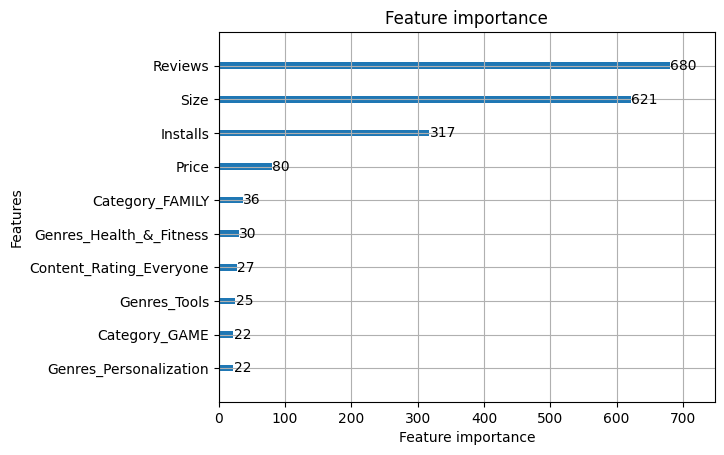

In [1858]:
lgb.plot_importance(lgbm, max_num_features = 10)

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

1. **Mean Squared Error (MSE):**
   - **Indication:** Measures the average of the squared differences between actual and predicted values.

2. **Root Mean Squared Error (RMSE):**
   - **Indication:** The square root of MSE, providing error magnitude in the same unit as the predicted variable.

3. **Mean Absolute Error (MAE):**
   - **Indication:** Measures the average absolute differences between actual and predicted values.

4. **R² (R-Squared):**
   - **Indication:** Indicates the proportion of variance in the dependent variable that is predictable from the independent variables.

### 2. Which ML model is performing the best and why?

In [1857]:
a = np.array([mae_reg,mse_reg,r2_reg,rmse_reg])
b = np.array([mae_nn,mse_nn,r2_nn,rmse_nn])
c = np.array([mae_dt,mse_dt,r2_dt,rmse_dt])
d = np.array([mae_rf,mse_rf,r2_rf,rmse_rf])
e = np.array([mae_lgb,mse_lgb,r2_lgb,rmse_lgb])

x = pd.DataFrame(data =[a,b,c,d,e], columns = ['MAE','MSE','R2_score','RMSE'], index = ['Linear Regression', 'Neural Networks', 'Decision Tree Regression', 'Random Forest Regressor','Light Gradient Boosted Model'])
x

,MAE,MSE,R2_score,RMSE
Linear Regression,0.354385,0.265773,0.090706,0.515532
Neural Networks,1.559463,4.379143,-13.982442,2.092640
Decision Tree Regression,0.456084,0.481046,-0.645810,0.693575
Random Forest Regressor,0.345716,0.262616,0.101508,0.512460
Light Gradient Boosted Model,0.336514,0.249762,0.145485,0.499762


* ***LightGBM is the best model so far, though the R² score is still low.***
* ***Random Forest and Linear Regression perform similarly, but both have limited predictive power.***
* ***Decision Tree and Neural Networks perform poorly, with negative R² values, meaning they are worse than predicting the mean.***

***This might be due to the less or barely any correlation among the dependent and independent variables. And if there’s little to no correlation, the models struggle to find meaningful patterns, resulting in low R² scores and high errors. Hence, to implement a more accurate model more relevant data is needed.***

## ***7.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [1859]:
# Saving the File
import pickle
import numpy as np

with open('lgbm_model.pkl', 'wb') as file:
    pickle.dump(lgbm, file)

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [1860]:
# Load the model from file
with open('lgbm_model.pkl', 'rb') as file:
    loaded_lgbm = pickle.load(file)

# Use the loaded model to make predictions
pred_loaded = loaded_lgbm.predict(X_test, num_iteration=loaded_lgbm.best_iteration)

# **Conclusion**

In this analysis of Google Play Store data, we found that most users rate apps between 4 and 5, with 4.5 being the most frequent rating, while ratings below 2 are rare. The "Family" and "Game" categories dominate the app market, whereas "Sports" has the fewest apps among the top 10. A vast majority (92.2%) of apps are free, and those priced under $10 generally receive good ratings. Apps with more reviews tend to have higher ratings, but some still receive low scores despite numerous reviews. The "Adults Only 18+" category has the highest average ratings, while the "Everyone" category has more apps with very low ratings. Reviews and installs have a strong positive correlation (0.6), but ratings have a very weak correlation with other factors. LightGBM emerged as the best-performing model, but all models showed limited predictive power due to weak correlations among variables, indicating the need for more relevant data to improve accuracy.